In [1]:
import matplotlib.pyplot as plt
from model.attention import *
import torch

In [2]:
def plot_attention(data, X_label=None, Y_label=None):
    fig, ax = plt.subplots(figsize=(20, 8))  # set figure size
    heatmap = ax.imshow(data, cmap="magma_r", alpha=0.9)
    ax.tick_params(top=True, bottom=False,
                   labeltop=True, labelbottom=False)
    cbar = ax.figure.colorbar(heatmap, ax=ax)

    # Set axis labels
    if X_label != None and Y_label != None:
        #X_label = [x_label for x_label in X_label]
        #Y_label = [y_label for y_label in Y_label]

        xticks = range(0, len(X_label))
        ax.set_xticks(xticks, minor=False)  
        ax.set_xticklabels(X_label, minor=False, rotation=45)  

        yticks = range(0, len(Y_label))
        ax.set_yticks(yticks, minor=False)
        ax.set_yticklabels(Y_label, minor=False)  

        ax.grid(True)
    
    plt.title(u'Attention Heatmap')
    plt.show()

## Any random Attention Head

In [3]:
d_model = 32
n_ctx = 128
attn = MultiHeadAttention(d_model, 4, save_pattern=True)
attn.to('cpu')
input = torch.rand(1, n_ctx, d_model)
out = attn(input)

In [4]:
# attn.pattern[0][0][torch.tril(torch.ones(attn.pattern[0][0].shape)) == 0] = 0

In [5]:
attn.pattern[0][0]

tensor([[1.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
        [0.5010, 0.4990, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
        [0.3346, 0.3312, 0.3342,  ..., 0.0000, 0.0000, 0.0000],
        ...,
        [0.0079, 0.0079, 0.0079,  ..., 0.0079, 0.0000, 0.0000],
        [0.0079, 0.0078, 0.0079,  ..., 0.0079, 0.0079, 0.0000],
        [0.0078, 0.0078, 0.0078,  ..., 0.0078, 0.0078, 0.0078]],
       grad_fn=<SelectBackward0>)

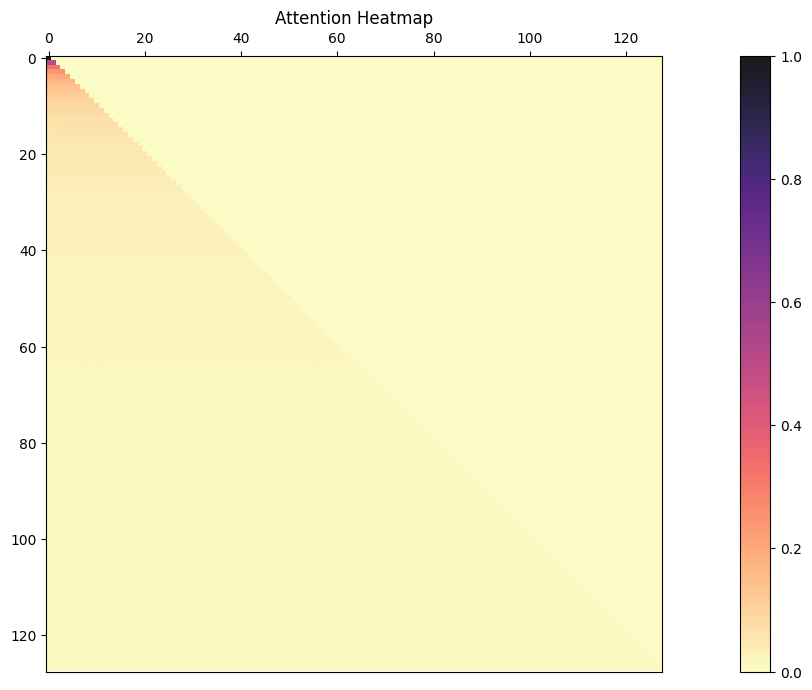

In [6]:
plot_attention(attn.pattern[0][0].detach().numpy())

## Visualize the latest model

In [7]:
from utils.config import *
from utils.cp_manager import *
model, _ = load_latest_model()
cfg = load_latest_model_config()
input = torch.rand(1, cfg.n_ctx, cfg.d_model)

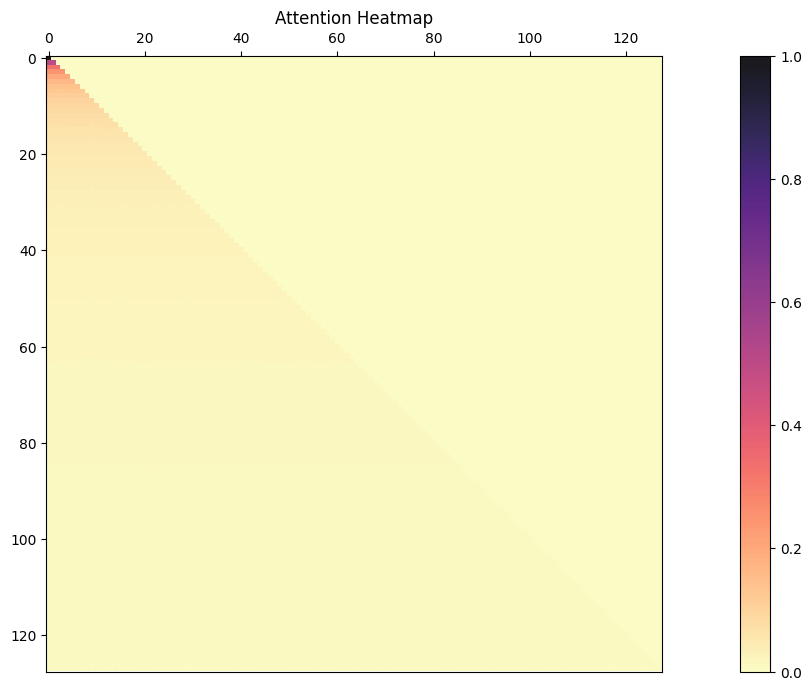

In [12]:
head = 0
block = 0
attn = model.blocks[block].attn.attention_heads
attn[head].save_pattern = True
output = attn[head](input)
plot_attention(attn[head].pattern.squeeze(0).cpu().detach().numpy())